<a href="https://colab.research.google.com/github/JoseMontero070362/Mql4/blob/main/PEM1AUDUSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GENERA DATOS DE PUNTOS DE EQUILIBRIO PARA TF = M1

In [ ]:
!mkdir data

In [ ]:
%cd /content/data
!unzip *.zip

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/data/AUDUSD_1_2022-01-03_2022-11-23.csv')
df.columns =['Date', 'Hour', 'Open', 'High','Low','Close','Volume']


df['MA_1_t']=round(df.Close.rolling(5).mean(),6)
df['MA_2_t']=round(df.Close.rolling(12).mean(),6)
df['MA_3_t']=round(df.Close.rolling(20).mean(),6)
df['MA_4_t']=round(df.Close.rolling(40).mean(),6)
df['MA_5_t']=round(df.Close.rolling(200).mean(),6)

In [ ]:
serie1 = df.dropna()
serie1.reset_index(drop=True)
df = serie1.reset_index(drop=True)


In [ ]:
df

In [ ]:
k1 = 0.0
k2 = 3
cont1 = 0
varpe6 = 0.0

for i in range (len(df)):

    dif1 = abs(df.loc[i,'MA_1_t']-df.loc[i,'MA_2_t'])*10000
    dif2 = abs(df.loc[i,'MA_1_t']-df.loc[i,'MA_3_t'])*10000
    dif3 = abs(df.loc[i,'MA_1_t']-df.loc[i,'MA_4_t'])*10000
    dif4 = abs(df.loc[i,'MA_2_t']-df.loc[i,'MA_3_t'])*10000
    dif5 = abs(df.loc[i,'MA_2_t']-df.loc[i,'MA_4_t'])*10000
    dif6 = abs(df.loc[i,'MA_3_t']-df.loc[i,'MA_4_t'])*10000
    if i <10:
      print("diferencia1:  ",dif1)


    if (((dif1  < k2) and (dif1 > k1)) and ((dif2 < k2) and (dif2  > k1)) and  # punto de quilibrio
        ((dif3  < k2) and (dif3 > k1)) and ((dif4 < k2) and (dif4 > k1))  and
        ((dif5  < k2) and (dif5 > k1)) and ((dif6 < k2) and (dif6 > k1))):


          varpe5 = (df.loc[i,"Close"]+df.loc[i,"Open"]+ df.loc[i,"High"]+ df.loc[i,"Low"])

          df.loc[i, "serie1"] = round(varpe5/4,6)
          if i <10:
            print("PE:  ",df.loc[i, "serie1"])
          cont1= cont1 + 1


diferencia1:   1.0500000000002174
PE:   0.72565
diferencia1:   1.3199999999990997
PE:   0.72565
diferencia1:   1.7000000000000348
PE:   0.72585
diferencia1:   0.900000000000345
PE:   0.725625
diferencia1:   0.2199999999996649
PE:   0.72565
diferencia1:   0.46999999999908226
PE:   0.7255
diferencia1:   0.8699999999994823
PE:   0.72555
diferencia1:   1.2999999999996348
PE:   0.7254
diferencia1:   1.3299999999993872
PE:   0.7255
diferencia1:   1.60000000000049
PE:   0.725375


In [ ]:
print("NumeroPE:", cont1)

NumeroPE: 133816


In [ ]:
df

In [ ]:
serie1 = df.dropna()
serie1.reset_index(drop=True)
df = serie1.reset_index(drop=True)



In [ ]:
df.reset_index(drop=True).to_csv ("serie6M1.csv",header = True,columns = ["serie1"],index = False)

In [ ]:
df6 = pd.read_csv('/content/data/serie6M1.csv') # puntos de equilibrio sin filtro


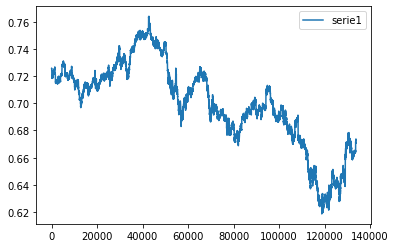

In [ ]:
df6.plot()

In [ ]:
d  = 10
cont2 = 0
diferencia_abs = 0

for i in range (len(df6)):

      if i > 0:

# Posicion = (posicion actual- posicion anterior)* 1000 en pips

          varpos1 = df6.loc[i-1, "serie1"]
          varpos2 = df6.loc[i, "serie1"]
          varpos3 = round(varpos2-varpos1,6)

          diferencia_abs  = round(abs(varpos3),6)*10000
          diferencia     = (round(varpos3,6))*10000


      if diferencia_abs >= d:
          cont2 = cont2 +1
          df6.loc[i,"serie2"] = diferencia_abs
          #print("POSICION",diferencia)



In [ ]:
serie = df6.dropna()
serie.reset_index(drop=True)
df6 = serie.reset_index(drop=True)


In [ ]:

df6.reset_index(drop=True).to_csv ("seriePEAUDUSD.csv",header = True,columns = ["serie1"],index = False)
df6.reset_index(drop=True).to_csv ("serie9M1.csv",header = True,columns = ["serie2"],index = False)

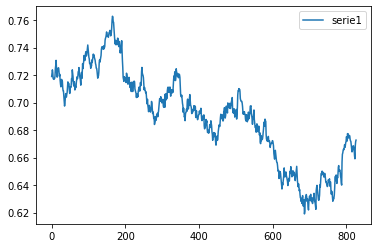

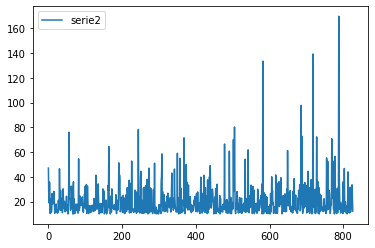

In [ ]:
df8 = pd.read_csv('/content/data/serie8M1.csv')
df7 = pd.read_csv('/content/data/serie9M1.csv')

df8.plot()
df7.plot()



In [ ]:
df7.mean()
#df8.mean()

serie2    20.155381
dtype: float64